In [1]:
# Dependencies
import tweepy
import json
import numpy as np
import pandas as pd
from datetime import datetime
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [2]:
# Twitter API Keys - redacted
consumer_key = 
consumer_secret = 
access_token = 
access_token_secret = 

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [3]:
# Blank dataframe to fill
tweet_df = pd.DataFrame(columns= ["Account", "Text", "Date",
                               "Compound","Positive","Neutral","Negative"])
tweet_df

,Account,Text,Date,Compound,Positive,Neutral,Negative


In [4]:
# Collect tweet data
accounts = ["@BBC", "@CBS", "@CNN", "@FoxNews", "@nytimes"]
i = 0

for account in accounts:
    tweets = api.user_timeline(account, count = 100)
    print("\n" + account + "\n")
    for tweet in tweets:
        text = tweet["text"]
        tweet_date = datetime.strptime(tweet["created_at"], "%a %b %d %H:%M:%S %z %Y")
        # Sentiment analysis
        compound = analyzer.polarity_scores(text)["compound"]
        pos = analyzer.polarity_scores(text)["pos"]
        neu = analyzer.polarity_scores(text)["neu"]
        neg = analyzer.polarity_scores(text)["neg"]
        print(text)
        print(f"  Compound: {compound}  |  Positive: {pos}  |  Neutral: {neu}  |  Negative: {neg}")
        # Store in df
        tweet_df.at[i, "Account"] = account
        tweet_df.at[i, "Text"] = text
        tweet_df.at[i, "Date"] = datetime.date(tweet_date).strftime("%m/%d/%y")
        tweet_df.at[i, "Compound"] = round(compound,3)
        tweet_df.at[i, "Positive"] = round(pos,3)
        tweet_df.at[i, "Neutral"] = round(neu,3)
        tweet_df.at[i, "Negative"] = round(neg,3)
        i += 1


@BBC

Seven charts that explain the plastic pollution problem. 📊 https://t.co/lunEPtp1f1 https://t.co/T4zi0jF6zO
  Compound: -0.4019  |  Positive: 0.0  |  Neutral: 0.769  |  Negative: 0.231
🎄😋 @Nigella_Lawson decamps to the countryside for her cosiest Christmas yet, against a backdrop of crackling log fi… https://t.co/fwrCQbIE3o
  Compound: 0.0  |  Positive: 0.0  |  Neutral: 1.0  |  Negative: 0.0
👴💕👵 Care home residents across the UK are decorating their walking frames as part of a project called #PimpMyZimmer… https://t.co/VDZz3ly5oG
  Compound: 0.4939  |  Positive: 0.151  |  Neutral: 0.849  |  Negative: 0.0
In the last 50,000 years, around 101 billion people have lived &amp; died on planet Earth. So what will we do with all… https://t.co/NpeQCCauhP
  Compound: -0.5574  |  Positive: 0.0  |  Neutral: 0.865  |  Negative: 0.135
You might have listened to these songs for years, but do you actually know the lyrics to some on the most well-know… https://t.co/Y0B4avJabB
  Compound: 0.0  |  

In [5]:
# Save tweets df to csv
tweet_df.to_csv("Last100Tweets.csv", index = False)

In [6]:
# Plots
import seaborn
from matplotlib import pyplot as plt
import datetime

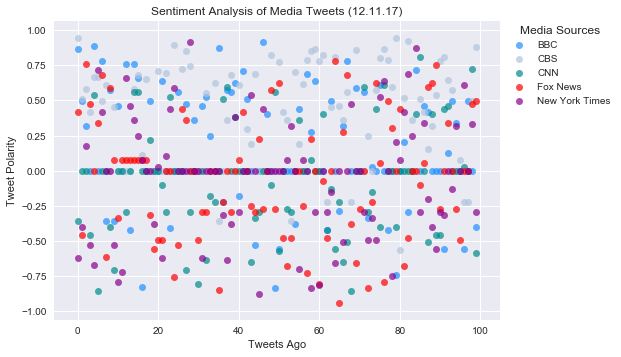

In [7]:
# Individual sentiment

colors = ["dodgerblue", "lightsteelblue", "darkcyan", "red", "darkmagenta"]
labels = ["BBC", "CBS", "CNN", "Fox News", "New York Times"]

plt.clf()

fig = plt.figure()
ax = plt.subplot()

for i, account in enumerate(accounts):
    df = tweet_df[tweet_df["Account"] == account]
    plt.scatter(np.arange(99,-1,-1),
            df["Compound"], marker = "o", linewidth = 0,
            alpha = .7, color = colors[i], edgecolors = "black",
            label = labels[i]
            )

ax.legend(loc='center left', bbox_to_anchor=(1,.85),
         title = "Media Sources")
plt.title("Sentiment Analysis of Media Tweets " +
         datetime.datetime.now().strftime("(%m.%d.%y)"))
plt.xlabel("Tweets Ago")    
plt.ylabel("Tweet Polarity")
plt.savefig("Sentiment Analyis of Media Tweets.png")
plt.show()

In [8]:
agg_comp = tweet_df[["Account", "Compound", "Positive", "Neutral", "Negative"]]
agg_comp[["Compound", "Positive", "Neutral", "Negative"]] = agg_comp[["Compound", "Positive", "Neutral", "Negative"]].apply(pd.to_numeric, errors='coerce')
bar_df = agg_comp.groupby("Account").mean().reset_index()
bar_df

C:\Users\Cynthia\Anaconda3\lib\site-packages\pandas\core\frame.py:2450: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


,Account,Compound,Positive,Neutral,Negative
0,@BBC,0.15047,0.09821,0.86027,0.04152
1,@CBS,0.38173,0.16209,0.82725,0.01066
2,@CNN,-0.05279,0.04420,0.88810,0.06770
3,@FoxNews,-0.04678,0.08479,0.81253,0.10269
4,@nytimes,-0.04734,0.07674,0.83532,0.08799


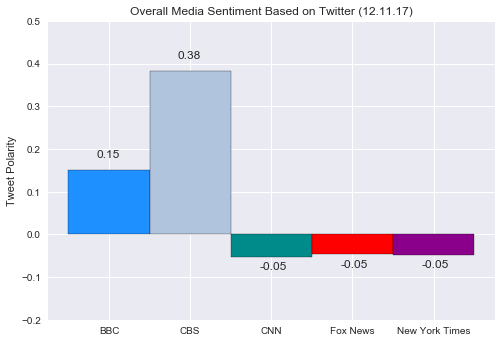

In [9]:
fig,ax = plt.subplots()
plt.bar(range(len(bar_df)), bar_df["Compound"], width = 1,
       edgecolor = "black", color = colors)
plt.ylabel("Tweet Polarity")
plt.title("Overall Media Sentiment Based on Twitter " +
         datetime.datetime.now().strftime("(%m.%d.%y)"))
plt.ylim(-.2, .5)
for i, v in enumerate(bar_df["Compound"]):
    if v < 0:
        ax.text(i-.15, v-.03, str(round(v,2)))
    else:
        ax.text(i-.15, v+.03, str(round(v, 2)))
plt.xticks(np.arange(5),labels, rotation = 0)
plt.savefig("Overall Media Sentiment Based on Twitter.png")
plt.show()